In [1]:
# Behavioral cloning 

In [2]:
!git clone https://github.com/Rishikesh-Jadhav/Track_Deep_Learning

Cloning into 'Track_Deep_Learning'...
remote: Enumerating objects: 17020, done.
remote: Total 17020 (delta 0), reused 0 (delta 0), pack-reused 17020
Receiving objects: 100% (17020/17020), 245.61 MiB | 13.10 MiB/s, done.
Updating files: 100% (17017/17017), done.


In [3]:
!pip3 install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!ls Track_Deep_Learning/

driving_log.csv  IMG


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import pandas as pd
from imgaug import augmenters as iaa #create functions for these augmentation techniques and call when required
import cv2
import random
import os # module helpful for path inclusion instead of specifying string path
import ntpath # to split path
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

%matplotlib inline

In [6]:
data_directory = 'Track_Deep_Learning'
columns = ['center','left','right','steering','throttle','reverse','speed']
df = pd.read_csv(os.path.join(data_directory,'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
df.head(5) 

<ipython-input-6-732bd529e0f9>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


center  \
0  C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\center_2023_02_13_14_28_29_922.jpg   
1  C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\center_2023_02_13_14_28_30_025.jpg   
2  C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\center_2023_02_13_14_28_30_127.jpg   
3  C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\center_2023_02_13_14_28_30_227.jpg   
4  C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\center_2023_02_13_14_28_30_329.jpg   

                                                                                                      left  \
0   C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\left_2023_02_13_14_28_29_922.jpg   
1   C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\left_2023_02_13_14_28_30_025.jpg   
2   C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\left_2023_02_13_14_28_30_127.jpg   
3   C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\left_2023_02_13_14_28_30_227.jpg   
4   C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\left_2023_02_13_14_28_30_329.jpg   

                                                                                                      right  \
0   C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\right_2023_02_13_14_28_29_922.jpg   
1   C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\right_2023_02_13_14_28_30_025.jpg   
2   C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\right_2023_02_13_14_28_30_127.jpg   
3   C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\right_2023_02_13_14_28_30_227.jpg   
4   C:\Users\rishi\OneDrive\Desktop\Autonomous_car_deep_learning\data\IMG\right_2023_02_13_14_28_30_329.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.000078  
1  0.0       0.0       0.0      0.000081  
2  0.0       0.0       0.0      0.000079  
3  0.0       0.0       0.0      0.000078  
4  0.0       0.0       0.0      0.000079

In [7]:
def path_leaf(path): # apply this to all of our data
  head,tail = ntpath.split(path)
  return tail

df['center'] = df['center'].apply(path_leaf)
df['left'] = df['left'].apply(path_leaf)
df['right'] = df['right'].apply(path_leaf)

df.head(10)

center                              left  \
0  center_2023_02_13_14_28_29_922.jpg  left_2023_02_13_14_28_29_922.jpg   
1  center_2023_02_13_14_28_30_025.jpg  left_2023_02_13_14_28_30_025.jpg   
2  center_2023_02_13_14_28_30_127.jpg  left_2023_02_13_14_28_30_127.jpg   
3  center_2023_02_13_14_28_30_227.jpg  left_2023_02_13_14_28_30_227.jpg   
4  center_2023_02_13_14_28_30_329.jpg  left_2023_02_13_14_28_30_329.jpg   
5  center_2023_02_13_14_28_30_430.jpg  left_2023_02_13_14_28_30_430.jpg   
6  center_2023_02_13_14_28_30_531.jpg  left_2023_02_13_14_28_30_531.jpg   
7  center_2023_02_13_14_28_30_634.jpg  left_2023_02_13_14_28_30_634.jpg   
8  center_2023_02_13_14_28_30_740.jpg  left_2023_02_13_14_28_30_740.jpg   
9  center_2023_02_13_14_28_30_842.jpg  left_2023_02_13_14_28_30_842.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2023_02_13_14_28_29_922.jpg  0.0       0.0       0.0      0.000078  
1  right_2023_02_13_14_28_30_025.jpg  0.0       0.0       0.0      0.000081  
2  right_2023_02_13_14_28_30_127.jpg  0.0       0.0       0.0      0.000079  
3  right_2023_02_13_14_28_30_227.jpg  0.0       0.0       0.0      0.000078  
4  right_2023_02_13_14_28_30_329.jpg  0.0       0.0       0.0      0.000079  
5  right_2023_02_13_14_28_30_430.jpg  0.0       0.0       0.0      0.000079  
6  right_2023_02_13_14_28_30_531.jpg  0.0       0.0       0.0      0.000078  
7  right_2023_02_13_14_28_30_634.jpg  0.0       0.0       0.0      0.000078  
8  right_2023_02_13_14_28_30_740.jpg  0.0       0.0       0.0      0.000081  
9  right_2023_02_13_14_28_30_842.jpg  0.0       0.0       0.0      0.000078

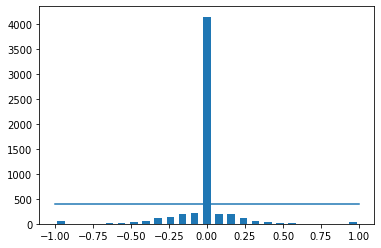

In [8]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(df['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df['steering']), np.max(df['steering'])), (samples_per_bin, samples_per_bin))

total data: 5672
removed: 3751
remaining: 1921


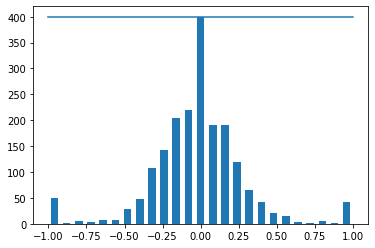

In [9]:
print('total data:', len(df))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(df['steering'])):
    if df['steering'][i] >= bins[j] and df['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
df.drop(df.index[remove_list], inplace=True)
print('remaining:', len(df))
 
hist, _ = np.histogram(df['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df['steering']), np.max(df['steering'])), (samples_per_bin, samples_per_bin))


In [10]:
print(df.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(df)):
    indexed_data = df.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

center      center_2023_02_13_14_28_31_255.jpg
left        left_2023_02_13_14_28_31_255.jpg  
right       right_2023_02_13_14_28_31_255.jpg 
steering    0.0                               
throttle    0.0                               
reverse     0.0                               
speed       0.000078                          
Name: 13, dtype: object


Training Samples: 4610
Valid Samples: 1153


Text(0.5, 1.0, 'Validation set')

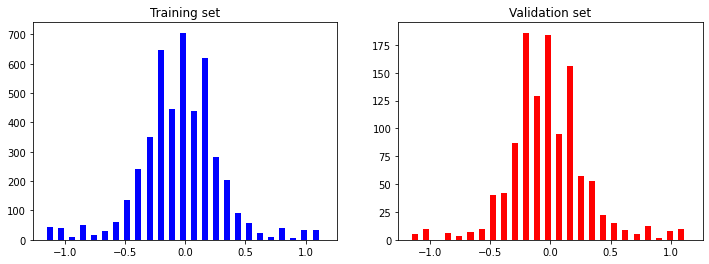

In [11]:
image_paths, steerings = load_img_steering(data_directory + '/IMG', df)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

Text(0.5, 1.0, 'Zoomed Image')

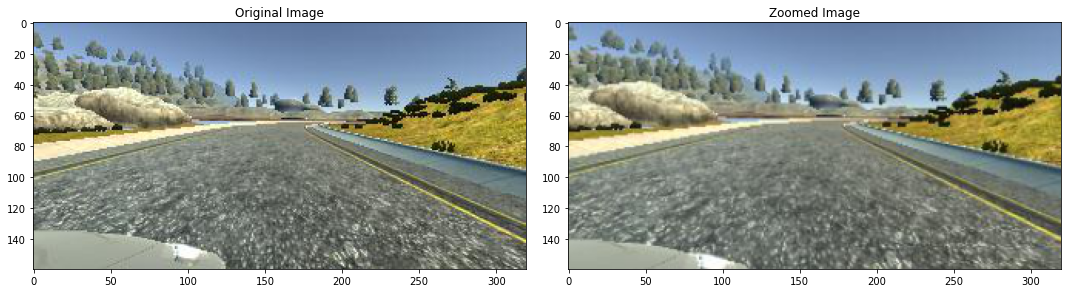

In [12]:

def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

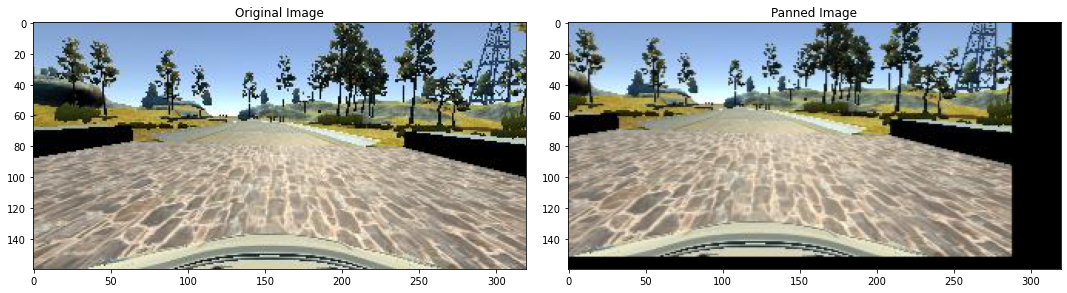

In [13]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')


Text(0.5, 1.0, 'Brightness altered image ')

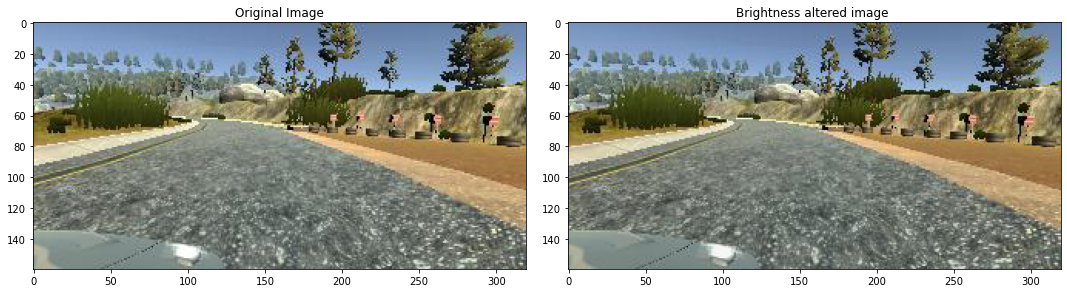

In [14]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [15]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.1065009')

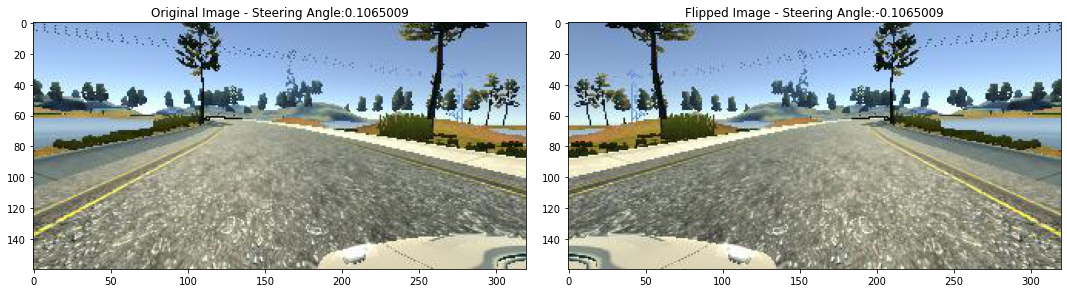

In [16]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]
 
 
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [17]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle

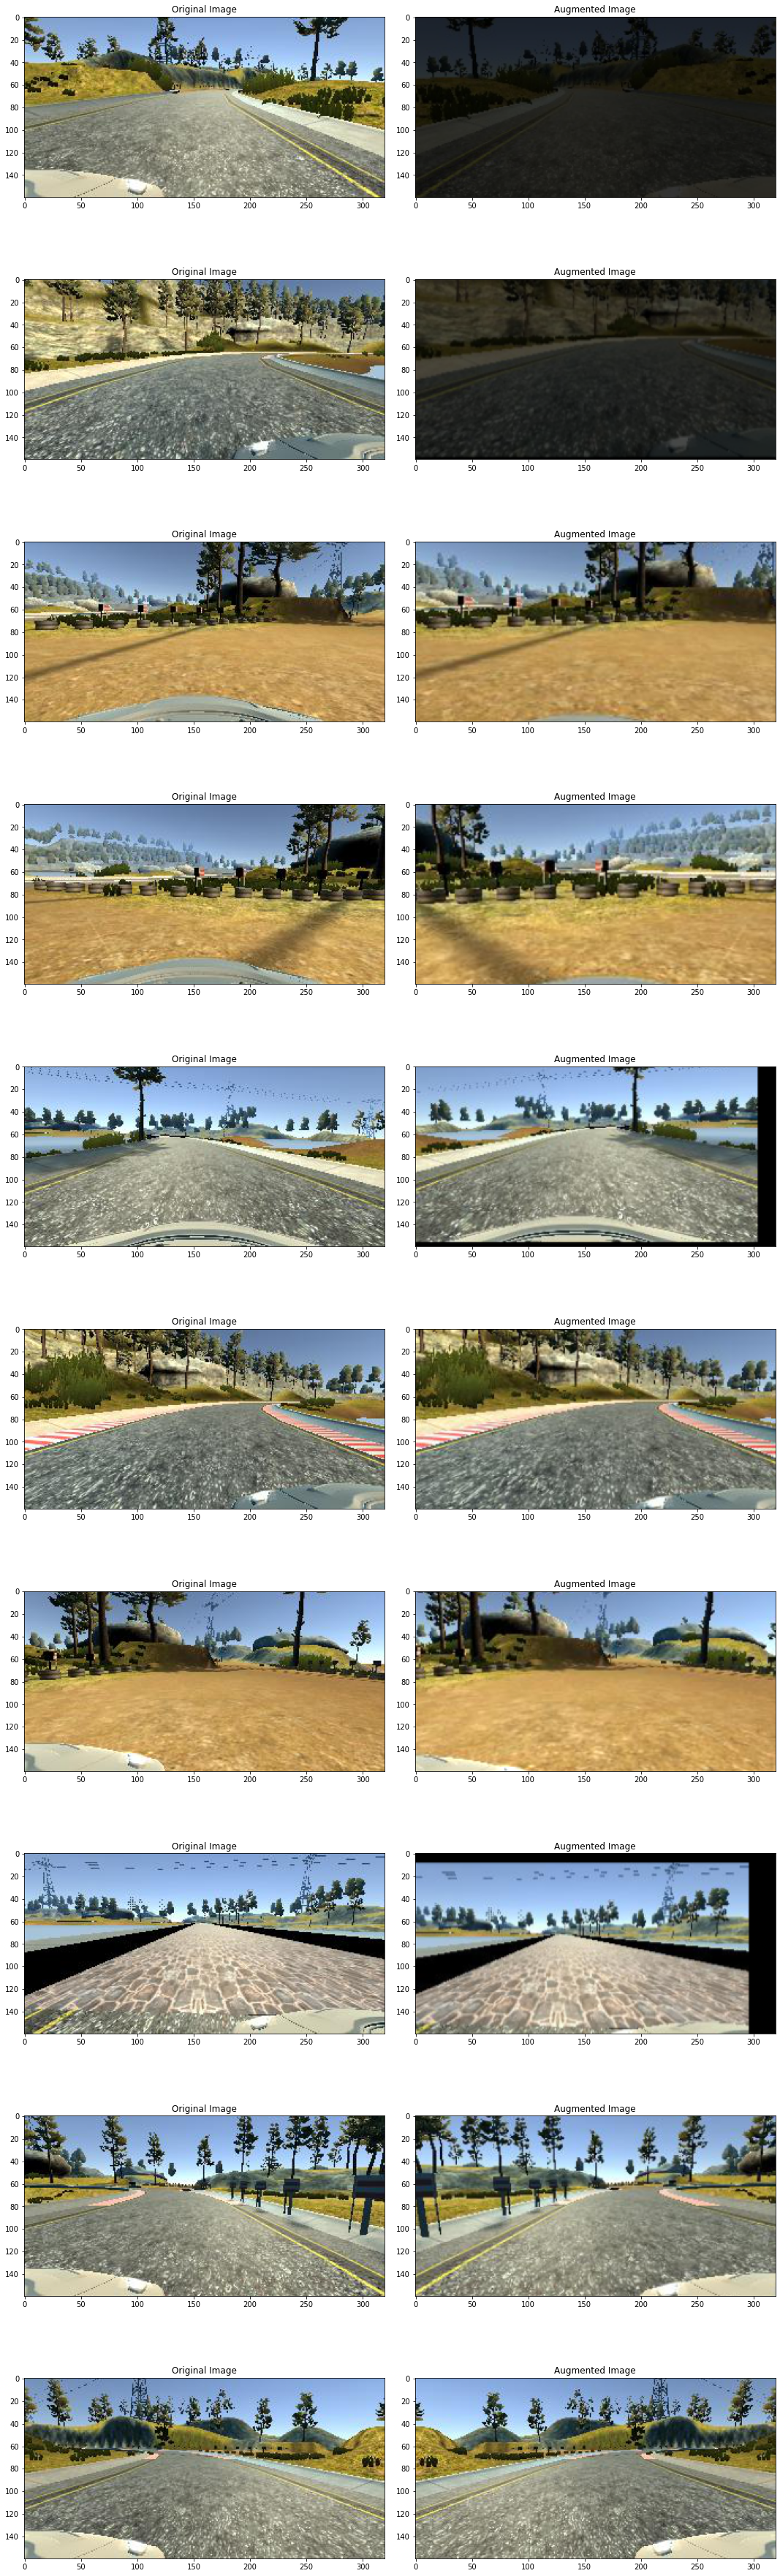

In [18]:
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

Text(0.5, 1.0, 'Preprocessed Image')

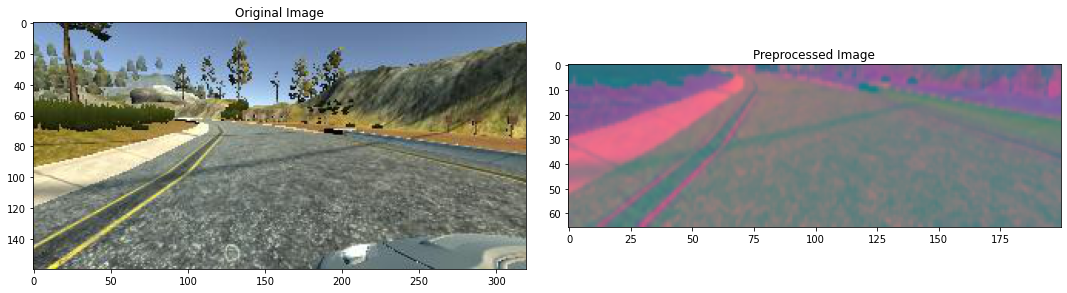

In [19]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [20]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

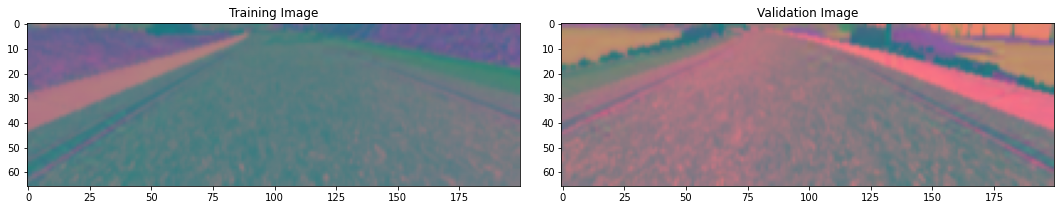

In [21]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [22]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
#   model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
#   model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
#   model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
#   model.add(Dropout(0.5))
 
  model.add(Dense(1))
  
  optimizer = Adam(1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model


In [23]:
model = nvidia_model()
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [ ]:
history = model.fit(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/10
130/300 [============>.................] - ETA: 3:11 - loss: 0.1538

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')


In [ ]:
model.save('model.h5')


In [ ]:
from google.colab import files


In [ ]:
files.download('model.h5')